# Breast Cancer

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [12]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
Y = breast_cancer.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [13]:
for k in [3, 5, 7, 11, 15]:

    knn_sklearn = KNeighborsClassifier(n_neighbors=k)
    knn_sklearn.fit(X_train, Y_train)
    accuracy = knn_sklearn.score(X_test, Y_test)
    print(f'k = {k}, Accuracy: {accuracy}')

k = 3, Accuracy: 0.9473684210526315
k = 5, Accuracy: 0.956140350877193
k = 7, Accuracy: 0.956140350877193
k = 11, Accuracy: 0.956140350877193
k = 15, Accuracy: 0.9473684210526315


| k      | 3      | 5      | 7      | 11      | 15      |
| :---   | :----  | :----  | :----  | :----   | :----   |
| Score  | 94.4%  | 95.6%  | 95.6%  | 95.6%   | 94.7%   |

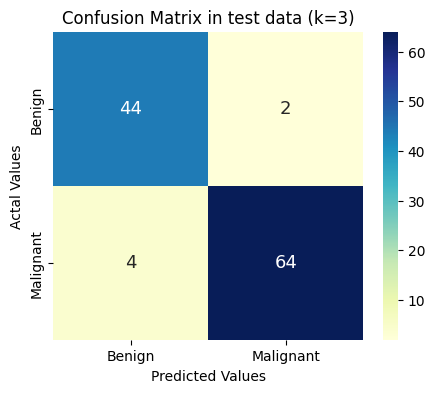

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sb

knn_sklearn = KNeighborsClassifier(n_neighbors=3)
knn_sklearn.fit(X_train, Y_train)
Y_pred = knn_sklearn.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['Benign','Malignant'], 
                     columns = ['Benign','Malignant'])

plt.figure(figsize=(5,4))
sb.heatmap(cm_df, annot=True, fmt='d', annot_kws={'size':13}, cmap="YlGnBu")
plt.title('Confusion Matrix in test data (k=3)')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()